# Zeisel GOrilla Analysis: SGBM vs RF

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

## Load Zeisel data

In [82]:
zeisel_ex_path = '/media/tmo/data/work/datasets/zeisel/expression_sara_filtered.txt'
zeisel_tf_path = '/media/tmo/data/work/datasets/TF/mm9_TFs.txt'

In [88]:
zeisel_df = pd.read_csv(zeisel_ex_path, sep='\t')

In [98]:
zeisel_genes = list(zeisel_df['Unnamed: 0'])

In [101]:
shuffle(zeisel_genes)

In [102]:
len(zeisel_genes)

13063

# Create GOrilla lists of top regulated genes + background genes

In [119]:
GOrilla_GENES = ['Olig1', 'Rel', 'Tspan2', 'Neurod2', 'Lef1', 'Gli3', 'Dlx1']

In [248]:
GOrilla_GENES_2 = ['Ywhae', 'Myrf', 'Diablo', 'Kcnip1']

In [120]:
def gorilla_list(df, TF, gene_names):
    targets = list(df[df['TF'] == TF].sort_values(by='importance', ascending=0)['target'])
    
    background = [gene for gene in gene_names if gene not in targets]
    
    return targets + background

#### SGBM GOrilla lists

In [124]:
for go_TF in GOrilla_GENES:
    go_list = gorilla_list(net_sgbm_df, go_TF, zeisel_genes)    
    pd.DataFrame(go_list).to_csv('GOrilla/SGBM/' + go_TF + '_sgbm_list.txt', index=False, header=False)        

In [249]:
for go_TF in GOrilla_GENES_2:
    go_list = gorilla_list(net_sgbm_df, go_TF, zeisel_genes)    
    pd.DataFrame(go_list).to_csv('GOrilla/SGBM/' + go_TF + '_sgbm_list.txt', index=False, header=False)        

In [231]:
GOrilla_GENES_3 = ['Fubp1', 'Trim28', 'Ruvbl1', 'Zfp207', 'Crebzf', 'Gtf2b', 'Msra', 'Ubxn1', 'Prkrir', 'Otud4', 'Klf8']

In [232]:
for go_TF in GOrilla_GENES_3:
    go_list = gorilla_list(net_sgbm_df, go_TF, zeisel_genes)    
    pd.DataFrame(go_list).to_csv('GOrilla/SGBM/' + go_TF + '_sgbm_list.txt', index=False, header=False)        

#### RF GOrilla lists

In [125]:
for go_TF in GOrilla_GENES:
    go_list = gorilla_list(net_rf_df, go_TF, zeisel_genes)
    pd.DataFrame(go_list).to_csv('GOrilla/RF/' + go_TF + '_rf_list.txt', index=False, header=False)

In [250]:
for go_TF in GOrilla_GENES_2:
    go_list = gorilla_list(net_rf_df, go_TF, zeisel_genes)
    pd.DataFrame(go_list).to_csv('GOrilla/RF/' + go_TF + '_rf_list.txt', index=False, header=False)

# GO enrichment comparison

## Olig1

In [141]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Olig1.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0008366,axon ensheathment,2.970000e-20
1,GO:0007272,ensheathment of neurons,2.970000e-20
2,GO:0042552,myelination,4.360000e-19
3,GO:0008610,lipid biosynthetic process,2.720000e-16
4,GO:0006629,lipid metabolic process,1.180000e-13


In [142]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Olig1.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0008366,axon ensheathment,2.080000e-21
1,GO:0007272,ensheathment of neurons,2.080000e-21
2,GO:0042552,myelination,5.530000e-20
3,GO:0016126,sterol biosynthetic process,2.460000e-16
4,GO:1902653,secondary alcohol biosynthetic process,5.810000e-16


## Neurod2

In [144]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Neurod2.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0050804,modulation of chemical synaptic transmission,3.400000e-18
1,GO:0048167,regulation of synaptic plasticity,3.620000e-16
2,GO:0120035,regulation of plasma membrane bounded cell pro...,4.450000e-14
3,GO:0031344,regulation of cell projection organization,6.950000e-14
4,GO:0010769,regulation of cell morphogenesis involved in d...,3.000000e-13


In [143]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Neurod2.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0048167,regulation of synaptic plasticity,2.360000e-25
1,GO:0050804,modulation of chemical synaptic transmission,2.720000e-25
2,GO:0120035,regulation of plasma membrane bounded cell pro...,1.010000e-17
3,GO:0031344,regulation of cell projection organization,1.900000e-17
4,GO:0051960,regulation of nervous system development,3.840000e-17


## Gli3

In [146]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Gli3.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0015711,organic anion transport,3.330000e-08
1,GO:0009653,anatomical structure morphogenesis,1.840000e-07
2,GO:0006873,cellular ion homeostasis,2.820000e-07
3,GO:0015849,organic acid transport,4.440000e-07
4,GO:0046942,carboxylic acid transport,4.440000e-07


In [147]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Gli3.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0015711,organic anion transport,2.500000e-08
1,GO:0050801,ion homeostasis,1.130000e-07
2,GO:0006873,cellular ion homeostasis,2.940000e-07
3,GO:0098771,inorganic ion homeostasis,3.390000e-07
4,GO:0042940,D-amino acid transport,3.470000e-07


## Lef1

In [148]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Lef1.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:1904018,positive regulation of vasculature development,3.710000e-11
1,GO:1901342,regulation of vasculature development,7.990000e-11
2,GO:0045766,positive regulation of angiogenesis,8.540000e-11
3,GO:0045765,regulation of angiogenesis,1.510000e-10
4,GO:0001525,angiogenesis,2.790000e-10


In [149]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Lef1.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:1901342,regulation of vasculature development,2.870000e-14
1,GO:0001525,angiogenesis,3.390000e-14
2,GO:0045765,regulation of angiogenesis,5.980000e-14
3,GO:1904018,positive regulation of vasculature development,5.240000e-13
4,GO:0045766,positive regulation of angiogenesis,9.820000e-13


## Rel

In [151]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Rel.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0006952,defense response,1.810000e-13
1,GO:0002376,immune system process,4.090000e-13
2,GO:0006955,immune response,6.420000e-13
3,GO:0002684,positive regulation of immune system process,5.960000e-12
4,GO:0050778,positive regulation of immune response,8.550000e-11


In [152]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Rel.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0006952,defense response,1.980000e-19
1,GO:0006954,inflammatory response,1.340000e-16
2,GO:0006955,immune response,4.440000e-15
3,GO:0002376,immune system process,2.990000e-13
4,GO:0002684,positive regulation of immune system process,4.330000e-13


## Tspan2

In [153]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Tspan2.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0070535,histone H2A K63-linked ubiquitination,0.000143
1,GO:0009048,dosage compensation by inactivation of X chrom...,0.000145
2,GO:0052200,response to host defenses,0.000178
3,GO:0052173,response to defenses of other organism involve...,0.000178
4,GO:0075136,response to host,0.000178


In [154]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Tspan2.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0070535,histone H2A K63-linked ubiquitination,0.000143
1,GO:0009048,dosage compensation by inactivation of X chrom...,0.000145
2,GO:0052200,response to host defenses,0.000178
3,GO:0052173,response to defenses of other organism involve...,0.000178
4,GO:0075136,response to host,0.000178


## Dlx1

In [156]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Dlx1.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0043269,regulation of ion transport,5.640000e-08
1,GO:0042133,neurotransmitter metabolic process,4.720000e-07
2,GO:0001505,regulation of neurotransmitter levels,5.870000e-07
3,GO:0007610,behavior,9.640000e-07
4,GO:0023052,signaling,1.890000e-06


In [157]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Dlx1.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0007610,behavior,4.670000e-11
1,GO:0043269,regulation of ion transport,1.740000e-09
2,GO:0023052,signaling,8.660000e-09
3,GO:0007267,cell-cell signaling,1.040000e-07
4,GO:0099536,synaptic signaling,3.060000e-07


## Myrf

In [170]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Myrf.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0008366,axon ensheathment,1.130000e-16
1,GO:0007272,ensheathment of neurons,1.130000e-16
2,GO:0042552,myelination,5.820000e-15
3,GO:0032291,axon ensheathment in central nervous system,8.340000e-09
4,GO:0022010,central nervous system myelination,8.340000e-09


In [172]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Myrf.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0008366,axon ensheathment,1.290000e-24
1,GO:0007272,ensheathment of neurons,1.290000e-24
2,GO:0042552,myelination,2.220000e-23
3,GO:0008610,lipid biosynthetic process,5.560000e-10
4,GO:0032291,axon ensheathment in central nervous system,2.460000e-09


## Kcnip1

In [251]:
pd.read_csv('GOrilla/SGBM/GOrilla/GOrilla_sgbm_Kcnip1.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0043269,regulation of ion transport,2.750000e-07
1,GO:0042133,neurotransmitter metabolic process,2.880000e-07
2,GO:0007610,behavior,4.620000e-07
3,GO:0032501,multicellular organismal process,1.050000e-06
4,GO:0048706,embryonic skeletal system development,1.210000e-06


In [254]:
pd.read_csv('GOrilla/RF/GOrilla/GOrilla_rf_Kcnip1.xls', sep='\t')[['GO Term', 'Description', 'P-value']].head()

,GO Term,Description,P-value
0,GO:0007610,behavior,4.430000e-10
1,GO:0032501,multicellular organismal process,6.710000e-09
2,GO:0050877,nervous system process,1.920000e-07
3,GO:0043269,regulation of ion transport,2.310000e-07
4,GO:0048731,system development,6.830000e-07


---

# Differences in recovered TF+regulator sets in top 100K regulatory links

* SGBM typically has lower scores in the P-values for the above GO enrichment lists
* On the other hand, SGBM recovers a lot more TF+regulator sets in the top 100K regulatory links
* There is a trade-off: recovering more good targets for fewer TFs, or recovering more TF with a non-trivial amount of targets

In [65]:
net_sgbm_df = pd.read_csv('zeisel_sgbm_100k.txt', sep='\t')

In [66]:
sgbm_tf_counts_df = pd.DataFrame(net_sgbm_df.TF.value_counts())
sgbm_tf_counts_df.reset_index(inplace=True)
sgbm_tf_counts_df.columns=['TF', 'count']

In [216]:
sgbm_TF_list = list(net_sgbm_df.TF.unique())
rf_TF_list = list(net_rf_df.TF.unique())

sgbm_minus_rf_TFs = [tf for tf in sgbm_TF_list if not tf in rf_TF_list]
sgbm_minus_rf_TF_df = pd.DataFrame(sgbm_minus_rf_TFs)
sgbm_minus_rf_TF_df.columns = ['TF']

rf_minus_sgbm_TFs = [tf for tf in rf_TF_list if not tf in sgbm_TF_list]
rf_minus_sgbm_TF_df = pd.DataFrame(rf_minus_sgbm_TFs)
rf_minus_sgbm_TF_df.columns = ['TF']

In [224]:
print('TF count: ' + str(len(rf_minus_sgbm_TF_df)))
rf_minus_sgbm_TF_df.merge(rf_tf_counts_df, on=['TF']).sort_values(by='count', ascending=0)

TF count: 13


,TF,count
1,Zfp354b,4
6,Zfp653,4
7,Tal1,3
0,Zfp710,2
2,Zfp961,1
3,Zfp280b,1
4,Mtf1,1
5,Zfp553,1
8,Zfp341,1
9,Hirip3,1


In [225]:
print('TF count: ' + str(len(sgbm_min_rf_TF_df)))
sgbm_min_rf_TF_df.merge(sgbm_tf_counts_df, on=['TF']).sort_values(by='count', ascending=0)

TF count: 87


,TF,count
9,Fubp1,56
3,Trim28,47
11,Ruvbl1,37
37,Zfp207,33
27,Crebzf,30
10,Gtf2b,27
8,Msra,27
7,Ubxn1,19
25,Prkrir,17
22,Otud4,17


In [238]:
for tf in list(net_sgbm_df[net_sgbm_df['TF'] == 'Fubp1']['target']):
    print(tf)

Pnn
Nap1l1
4930422G04Rik
Nedd4
Nagk
Uqcrc2
Dcaf13
Zranb2
Taf1d
Son
Rhbdd2
Casp8ap2
Sec24c
Sap130
Prpf39
Srsf10
Zfp523
Syt9
Ap5m1
Ift46
Ifnar1
Wdr47
Gipc1
Acvr2a
Npy2r
Spcs2
9530068E07Rik
Kidins220
Gon4l
Tnrc6b
Pias2
Ttc14
3110047P20Rik
Acox1
Cep192
Twistnb
Gprasp1
Narf
Mir1906-2_loc1
Yipf6
Sf3a3
Fam193a
Fip1l1
Igsf8
Arl8b
Rnf34
Ssr2
Casp2
Unk
Wdr33
Polr2c
Tbce
Glt8d2
Ctps
2700050L05Rik
Alg5


---

## RF

In [17]:
net_rf_df = pd.read_csv('zeisel_rf_100k.txt', sep='\t')

In [46]:
rf_tf_counts_df = pd.DataFrame(net_rf_df.TF.value_counts(), index=None)
rf_tf_counts_df.reset_index(inplace=True)
rf_tf_counts_df.columns=['TF', 'count']

In [48]:
rf_tf_counts_df.head()

,TF,count
0,Ywhaz,3660
1,Celf4,3037
2,Pkm,2957
3,Ywhae,2637
4,Mapk1,2543


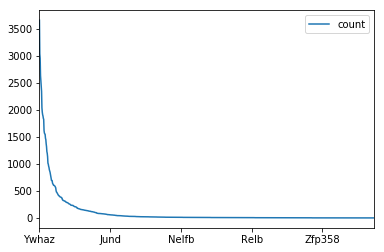

In [25]:
rf_tf_counts_df.plot()
plt.show()

In [53]:
merged = sgbm_tf_counts_df.merge(rf_tf_counts_df, on=['TF'])

In [55]:
merged.head()

,TF,count_x,count_y
0,Ywhae,2667,2637
1,Tcf4,2353,2343
2,Ywhaz,2311,3660
3,Celf4,2272,3037
4,Pkm,1965,2957


In [61]:
len(merged)

935

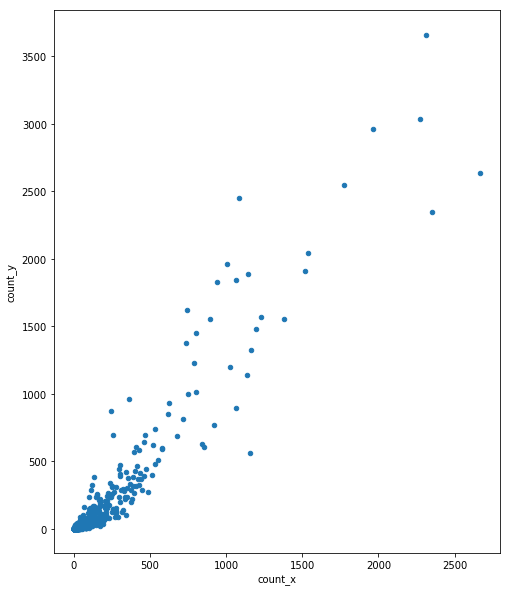

In [244]:
merged.plot.scatter(x='count_x', y='count_y', figsize=(8, 10))plt.show()

In [247]:
merged[merged.count_x > merged.count_y]

,TF,count_x,count_y
0,Ywhae,2667,2637
1,Tcf4,2353,2343
12,Mef2c,1158,558
16,Cers2,1064,892
21,Olig1,921,770
23,Hmgb1,853,605
24,Tppp,842,629
37,Cfl2,555,509
39,Peg3,531,481
41,Vamp3,511,401
